In [41]:
%matplotlib inline
import matplotlib.pyplot as plt


from datetime import datetime
import pandas as pd
from IPython.display import display, HTML
from IPython.core.pylabtools import figsize
import seaborn as sns


# Machine Learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn import preprocessing

# Arcgis api imports
import arcgis
from arcgis.geoenrichment import Country
from arcgis.features import summarize_data
from arcgis.features.enrich_data import enrich_layer
from arcgis.features import SpatialDataFrame
from arcgis.features import use_proximity 
from arcgis.gis import GIS
from arcgis.features import summarize_data
from arcgis.geometry import *

In [68]:
gis = GIS()

In [69]:
# Accessing NYCTracts
nyc_tract_full = gis.content.search('NYCTractData owner:api_data_owner', 'feature layer')[0]
nyc_tracts_layer = nyc_tract_full.layers[0]

In [78]:
# Get listing data
gis = GIS(username = 'ykhl1itj', password = 'Hacktech2020')
airbnb_listings = gis.content.get('28a6edd5f0eb4b2fb48cff6fd20618f0')

In [85]:
airbnb_agg = summarize_data.aggregate_points(point_layer=airbnb_listings, polygon_layer = nyc_tract_full, summary_fields = ["price Mean"], output_name=str(datetime.now().microsecond))
airbnb = airbnb_agg.layers[0]
sdf_airbnb = airbnb.query().sdf
sdf_airbnb.head()

,OBJECTID,Point_Count,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,Shape__Area,Shape__Length,MEAN_price,AnalysisArea,SHAPE
0,1,96,36,047,055100,36047055100,551,Census Tract 551,G5020,S,231586,0,+40.7139593,-073.9644095,403498.199219,2833.316907,81.343750,0.231586,"{""rings"": [[[-8234084.819, 4970390.8996], [-82..."
1,2,7,36,047,055200,36047055200,552,Census Tract 552,G5020,S,167671,0,+40.6083096,-073.9562588,291221.082031,2218.492564,51.428571,0.167671,"{""rings"": [[[-8233033.0714, 4955046.1346], [-8..."
2,3,86,36,047,055300,36047055300,553,Census Tract 553,G5020,S,156270,0,+40.7164576,-073.9592358,272297.589844,2218.417869,92.558140,0.156272,"{""rings"": [[[-8233444.5091, 4970481.0761], [-8..."
3,4,4,36,047,055400,36047055400,554,Census Tract 554,G5020,S,169301,0,+40.6078701,-073.9600716,294047.324219,2241.678033,47.000000,0.169301,"{""rings"": [[[-8233446.2895, 4954986.1605], [-8..."
4,5,11,36,081,118700,36081118700,1187,Census Tract 1187,G5020,S,187235,0,+40.7596321,-073.8128802,326668.605469,2531.699227,61.545455,0.187235,"{""rings"": [[[-8217058.0525, 4977061.797], [-82..."


In [86]:
# Get feature data
hospitals = gis.content.get('f87f15266b9449b19b3aa6b3420f82a1')
cafes = gis.content.get('7be19956a3f44278bbb3253a73bc2ea8')
museum = gis.content.get('e42031b7cd5049be8ea9fdfca9ab0c3f')
childcare = gis.content.get('eef89c353ee043858f785725f27a1f7c')
farmers = gis.content.get('3c8c57730d64427d83e0b162119a0341')
cultural = gis.content.get('8d006ca311e641f9aca258eb07530965')
bus = gis.content.get('6c7d5ea66fbc49b0b0b956d93ed70754')
basketball = gis.content.get('311edd4c3b134b499fac4b2fa2b9f3a2')
bars = gis.content.get('5180cf5bbd604ae5916ce4ccf91e6018')
art = gis.content.get('e391a7330ac84680835dc4e379ce084d')
preschool = gis.content.get('7f418ed752e84ea7980eaafb6d3367d6')
subway = gis.content.get('b6bce4ad80834660ba9253e8b15d651f')
crime = gis.content.get('92d68e626cc343ffae118cd41149f165')
schools = gis.content.get('c907a0d741724958946646047277f2bb')


In [87]:
# Aggregate feature data 
hospital_dist = use_proximity.find_nearest(nyc_tracts_layer, hospitals,measurement_type='StraightLine', max_count=1, output_name=str(datetime.now().microsecond))
cafe_agg = summarize_data.aggregate_points(point_layer=cafes, polygon_layer = nyc_tract_full, output_name=str(datetime.now().microsecond))
museum_agg = summarize_data.aggregate_points(point_layer=museum, polygon_layer = nyc_tract_full, output_name=str(datetime.now().microsecond))
childcare_agg = summarize_data.aggregate_points(point_layer=childcare, polygon_layer = nyc_tract_full, output_name=str(datetime.now().microsecond))
farmers_agg = summarize_data.aggregate_points(point_layer=farmers, polygon_layer = nyc_tract_full, output_name=str(datetime.now().microsecond))
cultural_agg = summarize_data.aggregate_points(point_layer=cultural, polygon_layer = nyc_tract_full, output_name=str(datetime.now().microsecond))
bus_agg = summarize_data.aggregate_points(point_layer=bus, polygon_layer = nyc_tract_full, output_name=str(datetime.now().microsecond))
basketball_agg = summarize_data.aggregate_points(point_layer=basketball, polygon_layer = nyc_tract_full, output_name=str(datetime.now().microsecond))
bars_agg = summarize_data.aggregate_points(point_layer=bars, polygon_layer = nyc_tract_full, output_name=str(datetime.now().microsecond))
art_agg = summarize_data.aggregate_points(point_layer=art, polygon_layer = nyc_tract_full, output_name=str(datetime.now().microsecond))
subway_agg = summarize_data.aggregate_points(point_layer=subway, polygon_layer = nyc_tract_full, output_name=str(datetime.now().microsecond))
preschool_agg = summarize_data.aggregate_points(point_layer=preschool, polygon_layer = nyc_tract_full, output_name=str(datetime.now().microsecond))
crime_agg = summarize_data.aggregate_points(point_layer=crime, polygon_layer = nyc_tract_full, output_name=str(datetime.now().microsecond))
schools_agg = summarize_data.aggregate_points(point_layer=schools, polygon_layer = nyc_tract_full, summary_fields = ["grad_pct Mean"], output_name=str(datetime.now().microsecond))

In [88]:
# Grab the data
hospital_dist_tract = hospital_dist.layers[1]
cafe_by_tract = cafe_agg.layers[0]
museum_by_tract = museum_agg.layers[0]
childcare_by_tract = childcare_agg.layers[0]
farmers_by_tract = farmers_agg.layers[0]
cultural_by_tract = cultural_agg.layers[0]
bus_by_tract = bus_agg.layers[0]
basketball_by_tract = basketball_agg.layers[0]
bars_by_tract = bars_agg.layers[0]
art_by_tract = art_agg.layers[0]
subway_by_tract = subway_agg.layers[0]
preschool_by_tract = preschool_agg.layers[0]
crime_by_tract = crime_agg.layers[0]
schools_by_tract = schools_agg.layers[0]

# Store data as query
sdf_hospital_dist = pd.DataFrame.spatial.from_layer(hospital_dist_tract)
sdf_cafe_by_tract = cafe_by_tract.query().sdf
sdf_museum_by_tract = museum_by_tract.query().sdf
sdf_childcare_by_tract = childcare_by_tract.query().sdf
sdf_farmers_by_tract = farmers_by_tract.query().sdf
sdf_cultural_by_tract = cultural_by_tract.query().sdf
sdf_bus_by_tract = bus_by_tract.query().sdf
sdf_basketball_by_tract = basketball_by_tract.query().sdf
sdf_bars_by_tract = bars_by_tract.query().sdf
sdf_art_by_tract = art_by_tract.query().sdf
sdf_subway_by_tract = subway_by_tract.query().sdf
sdf_preschool_by_tract = preschool_by_tract.query().sdf
sdf_crime_by_tract = crime_by_tract.query().sdf
sdf_schools_by_tract = schools_by_tract.query().sdf

sdf_hospital_dist.head()
sdf_schools_by_tract.head()


c:\users\aypan\hacktech\lib\site-packages\arcgis\features\layer.py:2044: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  "esriFieldTypeDate" : pd.datetime,


,OBJECTID,Point_Count,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,Shape__Area,Shape__Length,MEAN_grad_pct,AnalysisArea,SHAPE
0,1,0,36,047,055100,36047055100,551,Census Tract 551,G5020,S,231586,0,+40.7139593,-073.9644095,403498.199219,2833.316907,NaN,0.231586,"{""rings"": [[[-8234084.819, 4970390.8996], [-82..."
1,2,0,36,047,055200,36047055200,552,Census Tract 552,G5020,S,167671,0,+40.6083096,-073.9562588,291221.082031,2218.492564,NaN,0.167671,"{""rings"": [[[-8233033.0714, 4955046.1346], [-8..."
2,3,0,36,047,055300,36047055300,553,Census Tract 553,G5020,S,156270,0,+40.7164576,-073.9592358,272297.589844,2218.417869,NaN,0.156272,"{""rings"": [[[-8233444.5091, 4970481.0761], [-8..."
3,4,0,36,047,055400,36047055400,554,Census Tract 554,G5020,S,169301,0,+40.6078701,-073.9600716,294047.324219,2241.678033,NaN,0.169301,"{""rings"": [[[-8233446.2895, 4954986.1605], [-8..."
4,5,0,36,081,118700,36081118700,1187,Census Tract 1187,G5020,S,187235,0,+40.7596321,-073.8128802,326668.605469,2531.699227,NaN,0.187235,"{""rings"": [[[-8217058.0525, 4977061.797], [-82..."


In [90]:
sdf_hospital_dist.head()

,From_ID,From_Name,From_Shape__Area,From_Shape__Length,From_aland,From_awater,From_countyfp,From_funcstat,From_geoid,From_intptlat,...,To_Facility_Name,To_Facility_Type,To_ID,To_Latitude,To_Location_1,To_Longitude,To_NTA,To_Phone,To_Postcode,Total_Kilometers
0,1,551,403498.199219,2833.316907,231586,0,047,S,36047055100,+40.7139593,...,Jonathan Williams Houses Child Health Clinic,Child Health Center,26,40.715381,"118 Roebling Street\nBrooklyn, NY 11211\n(40.7...",-73.956135,North Side-South Side ...,718-387-6407,11211,0.350774
1,2,552,291221.082031,2218.492564,167671,0,047,S,36047055200,+40.6083096,...,Coney Island Hospital,Acute Care Hospital,31,40.586552,"2601 Ocean Parkway\nBrooklyn, NY 11235\n(40.58...",-73.966168,Brighton Beach ...,718-616-3000,11235,2.254586
2,3,553,272297.589844,2218.417869,156270,0,047,S,36047055300,+40.7164576,...,Jonathan Williams Houses Child Health Clinic,Child Health Center,26,40.715381,"118 Roebling Street\nBrooklyn, NY 11211\n(40.7...",-73.956135,North Side-South Side ...,718-387-6407,11211,0.136650
3,4,554,294047.324219,2241.678033,169301,0,047,S,36047055400,+40.6078701,...,Coney Island Hospital,Acute Care Hospital,31,40.586552,"2601 Ocean Parkway\nBrooklyn, NY 11235\n(40.58...",-73.966168,Brighton Beach ...,718-616-3000,11235,2.122701
4,5,1187,326668.605469,2531.699227,187235,0,081,S,36081118700,+40.7596321,...,Corona Child Health Clinic,Child Health Center,17,40.744001,"104 04 Corona Avenue\nCorona, NY 11368\n(40.74...",-73.858404,Corona ...,718-334-6100,11368,3.864385


In [113]:
sdf_airbnb_new = sdf_airbnb[['geoid', 'MEAN_price']]
sdf_airbnb_new = sdf_airbnb_new.rename(columns={'MEAN_price':'price'})

sdf_hospital_dist_new = sdf_hospital_dist[['From_geoid', 'Total_Kilometers']]
sdf_hospital_dist_new = sdf_hospital_dist_new.rename(columns={'From_geoid':'geoid', 'Total_Kilometers':'hospital'})

sdf_cafe_by_tract_new = sdf_cafe_by_tract[['geoid', 'Point_Count']]
sdf_cafe_by_tract_new = sdf_cafe_by_tract_new.rename(columns={'Point_Count':'cafe'})

sdf_museum_by_tract_new = sdf_museum_by_tract[['geoid', 'Point_Count']]
sdf_museum_by_tract_new = sdf_museum_by_tract_new.rename(columns={'Point_Count':'museum'})

sdf_childcare_by_tract_new = sdf_childcare_by_tract[['geoid', 'Point_Count']]
sdf_childcare_by_tract_new = sdf_childcare_by_tract_new.rename(columns={'Point_Count':'childcare'})

sdf_farmers_by_tract_new = sdf_farmers_by_tract[['geoid', 'Point_Count']]
sdf_farmers_by_tract_new = sdf_farmers_by_tract_new.rename(columns={'Point_Count':'farmers'})

sdf_cultural_by_tract_new = sdf_cultural_by_tract[['geoid', 'Point_Count']]
sdf_cultural_by_tract_new = sdf_cultural_by_tract_new.rename(columns={'Point_Count':'cultural'})

sdf_bus_by_tract_new = sdf_bus_by_tract[['geoid', 'Point_Count']]
sdf_bus_by_tract_new = sdf_bus_by_tract_new.rename(columns={'Point_Count':'bus'})

sdf_basketball_by_tract_new = sdf_basketball_by_tract[['geoid', 'Point_Count']]
sdf_basketball_by_tract_new = sdf_basketball_by_tract_new.rename(columns={'Point_Count':'basketball'})

sdf_bars_by_tract_new = sdf_bars_by_tract[['geoid', 'Point_Count']]
sdf_bars_by_tract_new = sdf_bars_by_tract_new.rename(columns={'Point_Count':'bars'})

sdf_art_by_tract_new = sdf_art_by_tract[['geoid', 'Point_Count']]
sdf_art_by_tract_new = sdf_art_by_tract_new.rename(columns={'Point_Count':'art'})

sdf_subway_by_tract_new = sdf_subway_by_tract[['geoid', 'Point_Count']]
sdf_subway_by_tract_new = sdf_subway_by_tract_new.rename(columns={'Point_Count':'subway'})

sdf_preschool_by_tract_new = sdf_preschool_by_tract[['geoid', 'Point_Count']]
sdf_preschool_by_tract_new = sdf_preschool_by_tract_new.rename(columns={'Point_Count':'preschool'})

sdf_crime_by_tract_new = sdf_crime_by_tract[['geoid', 'Point_Count']]
sdf_crime_by_tract_new = sdf_crime_by_tract_new.rename(columns={'Point_Count':'crime'})

sdf_schools_by_tract_new = sdf_schools_by_tract[['geoid', 'Point_Count']]
sdf_schools_by_tract_new = sdf_schools_by_tract_new.rename(columns={'Point_Count':'schools'})



In [114]:
merge_data_tract = sdf_hospital_dist_new.merge(sdf_cafe_by_tract_new, 
                                                on='geoid').merge(sdf_museum_by_tract_new, 
                                                on='geoid').merge(sdf_childcare_by_tract_new, 
                                                on='geoid').merge(sdf_farmers_by_tract_new, 
                                                on='geoid').merge(sdf_cultural_by_tract_new, 
                                                on='geoid').merge(sdf_bus_by_tract_new,
                                                on='geoid').merge(sdf_basketball_by_tract_new, 
                                                on='geoid').merge(sdf_bars_by_tract_new, 
                                                on='geoid').merge(sdf_art_by_tract_new, 
                                                on='geoid').merge(sdf_subway_by_tract_new, 
                                                on='geoid').merge(sdf_preschool_by_tract_new, 
                                                on='geoid').merge(sdf_crime_by_tract_new, 
                                                on='geoid').merge(sdf_schools_by_tract_new, 
                                                on='geoid')

merge_data_tract_new = merge_data_tract[['geoid', 'hospital', 'cafe', 'museum', 'childcare', 'farmers', 'cultural', 'bus', 
                                         'basketball', 'bars', 'art', 'subway', 'preschool', 'crime', 'schools']]

final_data = pd.merge(merge_data_tract_new, sdf_airbnb_new, left_on = 'geoid', right_on = 'geoid', how = 'left')

In [134]:
application_data = sdf_basketball_by_tract_new.merge(sdf_bus_by_tract_new,
                                                on='geoid').merge(sdf_subway_by_tract_new, 
                                                on='geoid').merge(sdf_cafe_by_tract_new, 
                                                on='geoid').merge(sdf_schools_by_tract_new, 
                                                on='geoid')

application_data_new = application_data[['geoid', 'cafe', 'bus', 'basketball', 'subway', 'schools']]
app_data_new = pd.merge(application_data_new, sdf_airbnb_new, left_on = 'geoid', right_on = 'geoid', how = 'left')
app_data_fill = app_data_new.fillna(0)
X_app = app_data_fill.drop(['geoid', 'price'], axis = 1)
Y_app = pd.DataFrame(app_data_fill['price'])

In [136]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_app, Y_app)
reg.coef_
reg.intercept_

array([47.82112393])

In [115]:
final_data_fill = final_data.fillna(0)

In [ ]:
X = final_data_fill.drop(['geoid', 'price'], axis = 1)
Y = pd.DataFrame(final_data_fill['price'])

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10, random_state = 20)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

# Converting the target into 1d array
y_train_array = y_train.values.flatten()
y_test_array = y_test.values.flatten() 

print(y_train_array.shape)
print(y_test_array.shape)

scaler = preprocessing.RobustScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns) 
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

(1950, 14)
(1950, 1)
(217, 14)
(217, 1)
(1950,)
(217,)


In [117]:
# Random forest with scaled data
# for the best parameters a grid search could be done which could take some time
# however this model uses the default parameters of RF algorithm, while the estimators are changed till the best fit is obtained
model_RF = RandomForestRegressor(n_estimators = 500, random_state=43)

# Train the model
model_RF.fit(X_train_scaled, y_train_array)

# Training metrics for Random forest model
print('Training metrics for Random forest model using scaled data')
ypred_RF_train = model_RF.predict(X_train_scaled)
print('r-square_RF_Train: ', round(model_RF.score(X_train_scaled, y_train_array), 2))

mse_RF_train = metrics.mean_squared_error(y_train_array, ypred_RF_train)  
print('RMSE_RF_train: ', round(np.sqrt(mse_RF_train),4))

mean_absolute_error_RF_train = metrics.mean_absolute_error(y_train_array, ypred_RF_train)
print('MAE_RF_train: ', round(mean_absolute_error_RF_train, 4)) 

# Test metrics for Random Forest model
print('\nTest metrics for Random Forest model scaled data')
ypred_RF_test = model_RF.predict(X_test_scaled)
print('r-square_RF_test: ', round(model_RF.score(X_test_scaled, y_test_array), 2))

mse_RF_test = metrics.mean_squared_error(y_test_array, ypred_RF_test) 
print('RMSE_RF_test: ', round(np.sqrt(mse_RF_test), 4))

mean_absolute_error_RF_test = metrics.mean_absolute_error(y_test_array, ypred_RF_test)
print('MAE_RF_test: ', round(mean_absolute_error_RF_test, 4))

Training metrics for Random forest model using scaled data
r-square_RF_Train:  0.86
RMSE_RF_train:  59.0054
MAE_RF_train:  16.8336

Test metrics for Random Forest model scaled data
r-square_RF_test:  -0.14
RMSE_RF_test:  141.7463
MAE_RF_test:  50.4834


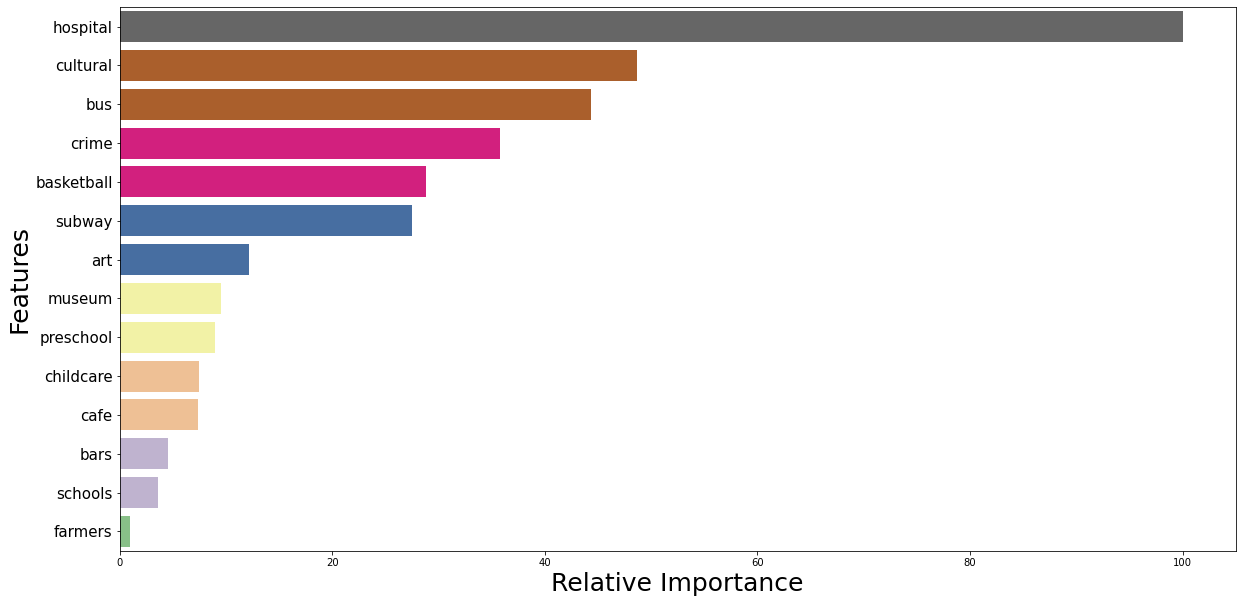

In [118]:
feature_imp_RF = model_RF.feature_importances_

#relative feature importance  
rel_feature_imp = 100 * (feature_imp_RF / max(feature_imp_RF)) 
rel_feature_imp = pd.DataFrame({'features':list(X_train.columns),
                                'rel_importance':rel_feature_imp })

rel_feature_imp = rel_feature_imp.sort_values('rel_importance', ascending=False)


#plotting the top twenty important features
top20_features = rel_feature_imp.head(20) 

plt.figure(figsize=[20,10])
plt.yticks(fontsize=15)
ax = sns.barplot(x="rel_importance", y="features",
                 data=top20_features,
                 palette="Accent_r")

plt.xlabel("Relative Importance", fontsize=25)
plt.ylabel("Features", fontsize=25)
plt.show()